![](https://imgk.timesnownews.com/story/iStock-1190016586_33.jpg?tr=w-560,h-292,fo-top)

## Importing libraries


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading CSV file


In [4]:
data = pd.read_csv('Suicides in India 2001-2012.csv')
print("file loaded")

file loaded


## Reviewing data

In [5]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [7]:
data.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

## Count of total number of suicide by states

In [9]:
by_states= data.groupby('State').count()['Total'].reset_index().sort_values(by= 'Total',ascending=False)
by_states.style.background_gradient(cmap='Reds')

,State,Total
19,Madhya Pradesh,6792
20,Maharashtra,6792
16,Karnataka,6792
25,Odisha,6791
1,Andhra Pradesh,6791
28,Rajasthan,6791
4,Bihar,6790
6,Chhattisgarh,6790
12,Haryana,6790
17,Kerala,6788


## As the above groupby does not show the correct results will need to clean the data

In [10]:
data.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
data.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
data.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
data.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
data.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [11]:
data['State'].value_counts()

Madhya Pradesh       6792
Karnataka            6792
Maharashtra          6792
Rajasthan            6791
Odisha               6791
Andhra Pradesh       6791
Chhattisgarh         6790
Haryana              6790
Bihar                6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Delhi                6782
Tripura              6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (Uts)           312
Total (States)        312
Total (All India)     312
Name: State,

In [12]:
data= data.drop(data[(data['State']== 'Total (States)') | (data['State']== 'Total (Uts)') | 
                     (data['State']== 'Total (All India)')].index)

In [13]:
data = data.drop(data[data.Total==0].index)

## Now let's try again

In [14]:
by_states= data.groupby('State').count()['Total'].reset_index().sort_values(by= 'Total',ascending=False)
by_states.style.background_gradient(cmap='Reds')

,State,Total
1,Andhra Pradesh,5185
16,Karnataka,5115
30,Tamil Nadu,5054
19,Madhya Pradesh,5029
20,Maharashtra,4958
32,Uttar Pradesh,4954
11,Gujarat,4856
34,West Bengal,4596
17,Kerala,4509
6,Chhattisgarh,4368


## Hanging was the most used method for committing suicide

In [15]:
type_list= data.groupby('Type').count()['Total'].reset_index().sort_values(by= 'Total',ascending=False)
type_list

,Type,Total
49,Others (Please Specify),5509
7,By Hanging,3514
21,Causes Not known,3332
47,Other Causes (Please Specity),3065
30,Family Problems,3013
...,...,...
35,Ideological Causes/Hero Worshipping,471
36,Illegitimate Pregnancy,420
12,By Other means,213
1,Bankruptcy or Sudden change in Economic Status,126


c:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


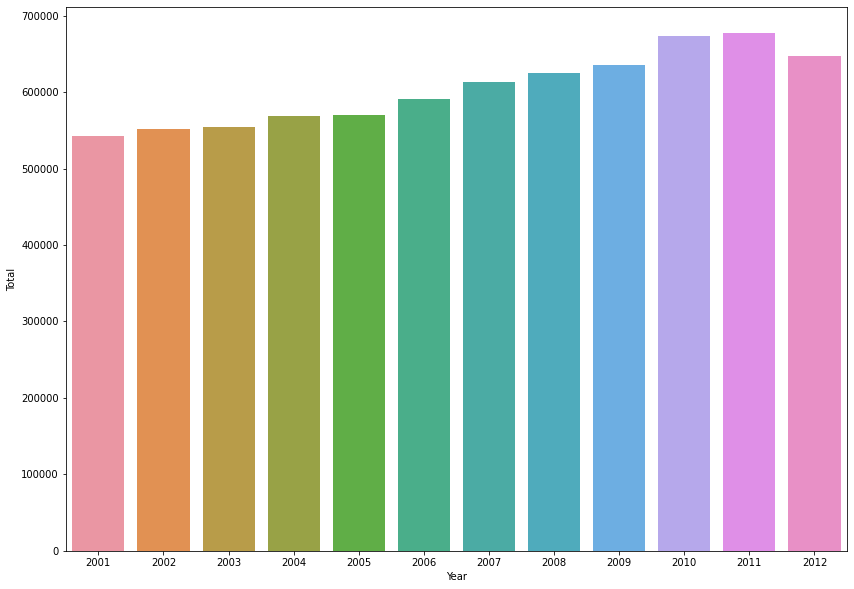

In [16]:
year_total= data.groupby('Year')['Total'].sum().reset_index()
plt.figure(figsize=(14, 10))
_=sns.barplot('Year','Total',data=year_total.sort_values(by='Year',ascending=True))
plt.show()

c:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


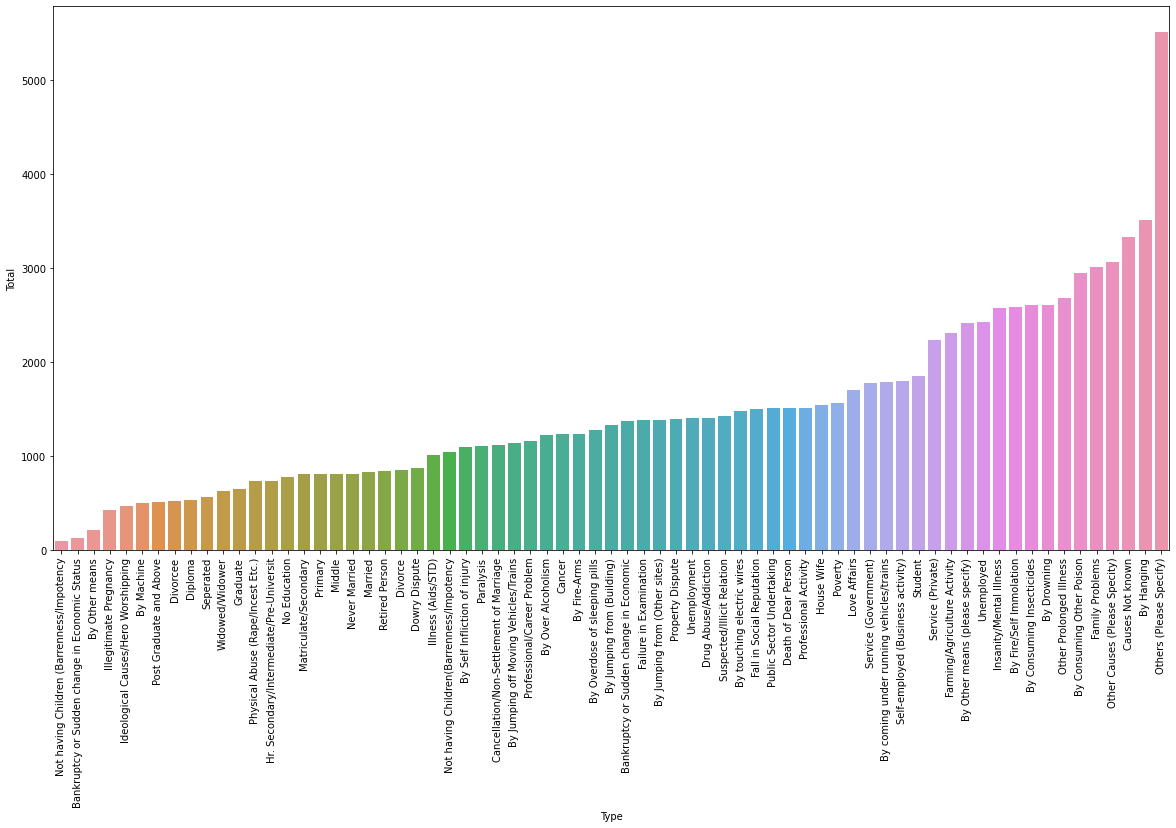

In [17]:

plt.figure(figsize=(20, 10))
_=sns.barplot('Type','Total',data=type_list.sort_values(by='Total',ascending=True))
plt.xticks(rotation=90)
plt.show()

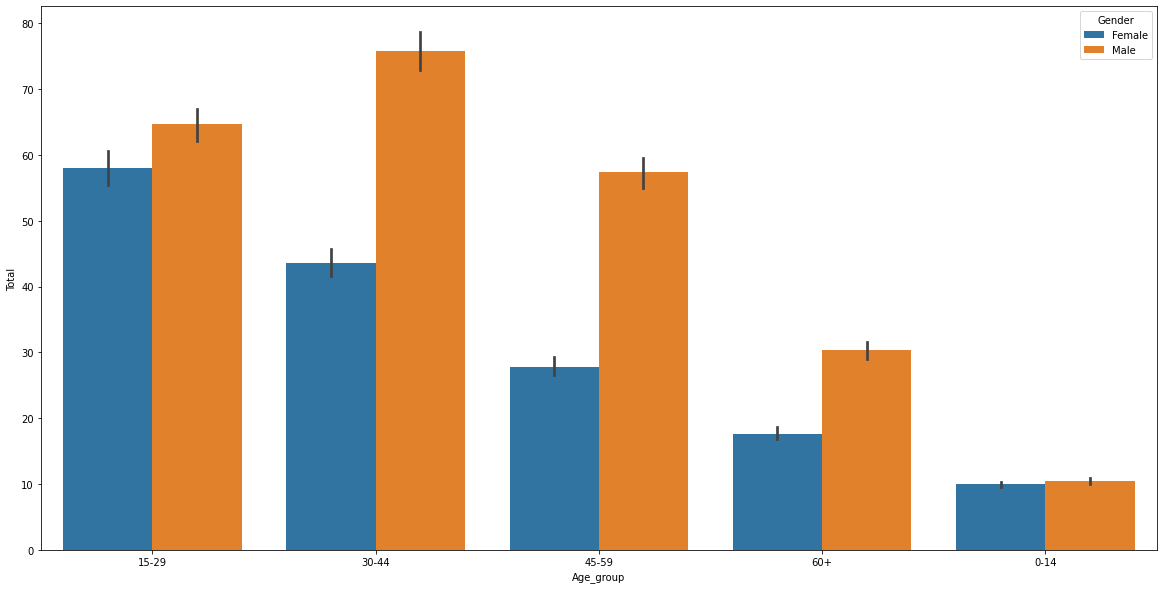

In [18]:
df_Age = data[data['Age_group']!='0-100+']
plt.figure(figsize=(20, 10))
_=sns.barplot(x='Age_group',y='Total',data=df_Age.sort_values(by='Total',ascending=False),hue='Gender')
plt.show()

# Conclusion
* Andhra pardesh, Karnatka, Tamil naidu are the top 3 states with the highest rate of suicide
* Nagaland, Lakshadweep, Daman & Diu are the top 3 states with the lowest rate of suicide
* From 2006 to 2011 there was increase in the suicde rate but in 2012 it decreased
* Hanging was the most used method for committing suicide
* Male from age group 30-44 commited most suicide
* Female from age group 15-29 commited most suicide
